# Cours Programmation Dynamique
### Source     :
### Adaptation : Fabrice Mulotti
v1.0

In [1]:
import gym
import numpy as np
import sys
%matplotlib inline
import matplotlib.pyplot as plt

if "../" not in sys.path:
  sys.path.append("../") 

from lib.envs.windy_gridworld import WindyGridworldEnv

# Disable jedi autocompleter
%config Completer.use_jedi = False
# %matplotlib inline
# %matplotlib widget

### Déclaration env

In [2]:
env = gym.make('FrozenLake8x8-v1',is_slippery = True)
# env = gym.make('FrozenLake-v1',is_slippery=False)


In [4]:
env.render()


SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG


### Quelques caractéristiques de notre env

In [5]:
env.observation_space.n

64

In [6]:
env.action_space.n

4

env.P[s] nous permet de déterminer en fonction de l'état s et de l'action a:
prob , s' , r , final ?

In [7]:
env.P[0]

{0: [(0.3333333333333333, 0, 0.0, False),
  (0.3333333333333333, 0, 0.0, False),
  (0.3333333333333333, 8, 0.0, False)],
 1: [(0.3333333333333333, 0, 0.0, False),
  (0.3333333333333333, 8, 0.0, False),
  (0.3333333333333333, 1, 0.0, False)],
 2: [(0.3333333333333333, 8, 0.0, False),
  (0.3333333333333333, 1, 0.0, False),
  (0.3333333333333333, 0, 0.0, False)],
 3: [(0.3333333333333333, 1, 0.0, False),
  (0.3333333333333333, 0, 0.0, False),
  (0.3333333333333333, 0, 0.0, False)]}

-> Exemple pour l'état 0 et l'action 0 et le premier état s' dans la liste

In [8]:
env.P[0][0][0]

(0.3333333333333333, 0, 0.0, False)

![title](static/value_iteration.png)

In [9]:
# Recherche de v*
def value_iteration(env,theta,max_iter,gamma):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    deltaT = []

    fvalue=np.full(env.observation_space.n,0.0)
    for k in range(max_iter):
        save_fvalue=np.copy(fvalue)
        for s in range(env.observation_space.n):  
            max_Qa = -100
            for a in range(env.action_space.n):
                q=0
                for p,s_,r,done in env.P[s][a]:
                    q = q + p * (r + gamma * save_fvalue[s_])
                    # print("s=",s," a=",a," s_=",s_,"q = ",q,"[",p,r,"]")
                max_Qa=max(max_Qa,q)
                # print(max_Qa,q)
                # print(p,s,s_,a,r,max_Qa)

            fvalue[s] = max_Qa
        # print(fvalue.reshape(4,4))
        delta=np.sum(np.fabs(save_fvalue - fvalue))
        deltaT.append(delta)
        
        if int(k/100)==k/100:
            ax.plot(deltaT)
            fig.canvas.draw()

        if (delta <= theta):
            break
    return(k,fvalue)


172  itérations


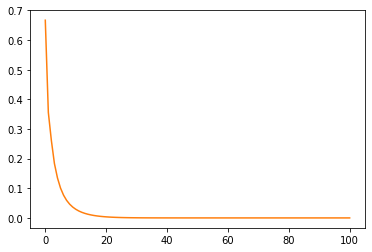

In [10]:
plt.ion()
k,fv=value_iteration(env=env,theta=1e-20,max_iter=10000,gamma=0.8)
print(k," itérations")

In [11]:
fv

array([2.23748318e-04, 3.91559557e-04, 7.35848269e-04, 1.38030588e-03,
       2.47307501e-03, 3.86416591e-03, 5.54943548e-03, 6.54514355e-03,
       2.05341393e-04, 3.40940513e-04, 6.43276858e-04, 1.32276616e-03,
       2.93679037e-03, 5.07702076e-03, 8.71580401e-03, 1.14540012e-02,
       1.63284328e-04, 2.43690510e-04, 3.53673785e-04, 0.00000000e+00,
       3.46286813e-03, 6.45885793e-03, 1.56808284e-02, 2.27826993e-02,
       1.39094343e-04, 2.19225114e-04, 4.39309325e-04, 1.07451107e-03,
       3.59010719e-03, 0.00000000e+00, 2.73046030e-02, 4.69715948e-02,
       9.56836788e-05, 1.24035774e-04, 1.50225360e-04, 0.00000000e+00,
       8.92552275e-03, 1.98525068e-02, 3.97398380e-02, 1.01867283e-01,
       4.45215055e-05, 0.00000000e+00, 0.00000000e+00, 2.89829874e-03,
       1.00280963e-02, 2.57815397e-02, 0.00000000e+00, 2.33163433e-01,
       2.67504613e-05, 0.00000000e+00, 2.53666017e-04, 8.40523934e-04,
       0.00000000e+00, 6.68001709e-02, 0.00000000e+00, 5.39332157e-01,
      

In [12]:
# Détermination de la meilleur politique pi*
def best_policy(env,fvalue,gamma):
    policy=np.zeros(env.observation_space.n)
    for s in range(env.observation_space.n):
        Q = []
        for a in range(env.action_space.n):
            q=0
            for p,s_,r,done in env.P[s][a]:
                q = q + p * (r + gamma * fvalue[s_])
            Q.append(q)
        # print(Q,np.argmax(np.array(Q)))
        policy[s]=np.argmax(Q)
    return(policy)

In [13]:
policy=best_policy(env,fv,1)

In [59]:
np.save("iteration_valeur_best_policy",policy)

# Testons l'environnement

0: LEFT <br>
1: DOWN<br>
2: RIGHT<br>
3: UP<br>

In [14]:
curpos=env.reset()
env.render()
print(policy)
done=False
print("Start")
while done == False:
    back=env.step(int(policy[curpos]))
    # print("Curpos ",curpos,", Policy ",policy[curpos],back)
    curpos=back[0]
    done=back[2]
    # env.render()
    # time.sleep(1)
print("Done ",back)


SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
[3. 2. 2. 2. 2. 2. 2. 2. 3. 2. 2. 3. 2. 2. 2. 1. 3. 2. 0. 0. 2. 3. 2. 1.
 3. 3. 3. 1. 0. 0. 2. 1. 3. 3. 0. 0. 2. 1. 3. 2. 0. 0. 0. 1. 3. 0. 0. 2.
 0. 0. 1. 0. 0. 0. 0. 2. 1. 1. 0. 0. 1. 1. 1. 0.]
Start
Done  (63, 1.0, True, {'prob': 0.3333333333333333})
